<a href="https://colab.research.google.com/github/DaniilAszn/Math_modeling_2_course/blob/main/MMAP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 1**

В соответствии с практикой 1 реализовать дикретизацию интегрального уравнения Фредгольма 2-го рода с вырожденным ядром на отрезке с произвольным количеством точек коллокации N:

$$u(x) + \int \limits_{0}^{1} xy \cdot u(y) dy = x$$

Решение описано ранее

# **Задание 2**

Реализовать на любом языке программирования стабилизированный метод бисопряженных градиентов и протестировать его на решении задачи 1

Стабилизированный метод бисопряжённых градиентов:

**1\. Подготовка:**
1. $u_0 = \overrightarrow 0$
2. $r_0 = f - Au_0$
3. $\tilde{r} = r_0$
4. $\rho_0 = \alpha_0 = \omega_0 = 1$
5. $v_0 = p_0 = s_0 = \overrightarrow 0$

**2\. Итерации:**
1. $\rho_k = <\tilde{r}, r_{k-1}>$
2. $\beta_k = \frac{\rho_k}{\rho_{k-1}} \cdot \frac{\alpha_{k-1}}{\omega_{k-1}}$
3. $p_k = r_{k-1} + \beta_k \cdot (p_{k-1} - \omega_{k-1} \cdot v_{k-1})$
4. $v_k = Ap_k$
5. $\alpha_k = \frac{\rho_k}{<\tilde{r}, v_k>}$
6. $s_k = r_{k-1} - \alpha_k \cdot v_k$
7. $t_k = As_k$
8. $\omega_k = \frac{<t_k, s_k>}{<t_k, t_k>}$
9. $u_k = u_{k-1} + \omega_k s_k + \alpha_k p_k$
10. $r_k = s_k - \omega_k t_k$

**3\. Критерий останова:**

0. $\varepsilon - маленькое$
1. $\frac{\lVert u_k - u_{k-1} \rVert}{\lVert f \rVert} < \varepsilon$

## А что стоит за этими формулами?

Проекционные методы решения СЛАУ — класс итерационных методов, в которых решается задача проектирования неизвестного вектора на некоторое пространство оптимально относительно другого некоторого пространства.

### Постановка задачи:

Рассмотрим СЛАУ $Ax = b$, где $A \in ℝ^{n \times n}$. Пусть $K^m, L^m \subset ℝ^n$. Необходимо найти такой вектор $\tilde{x} \in K$, чтобы $b - A\tilde{x} \perp L$, т.е. выполнялось условие:

$$\forall l \in L: <A\tilde{x}, l> = <b, l>,$$

называемое условием Петрова-Галёркина.


Если известно начальное приближение $x_0$, то тогда решение должно проецироваться на аффинное пространство $x_0 + K$. Представим $\tilde{x} = x_0 + \delta$ и обозначим невязку начального приближения как $r_0 = b - Ax_0$.

$$b - A\tilde{x} = b - A(x_0 + \delta) = b - Ax_0 - A\delta = (b - Ax_0) - A\delta = r_0 - A\delta.$$

Тогда постановку задачи можно сформулировать следующим образом: Необходимо найти такую поправку $\delta \in K$, чтобы $r_0 - A\delta \perp L$, т.е. выполнялось условие:

$$\tilde{x} = x_0 + \delta$$

$$\forall l \in L: <r_0 - A\delta, l> = 0$$


### Общий подход к построению проекционных методов:

Введём матричные базисы в пространствах $K$ и $L$:

$V \in ℝ^{n \times m}$ - матрица составленная из базисных векторов-столбцов пространства $K$.

$W \in ℝ^{n \times m}$ - матрица составленная из базисных векторов-столбцов пространства $L$.

Тогда $\delta = Vy$ и вектор-решение $\tilde{x}$ может быть записан:

$$\tilde{x} = x_0 + Vy,$$

где $y \in ℝ^m$ - вектор коэффициентов.

Тогда выражение $<r_0 - A\delta, l> = 0$ может быть переписано в виде:

$$W^T(r_0 - A\delta) = \overrightarrow 0,$$

откуда $W^TAVy = W^Tr_0$ и

$$y = (W^TAV)^{-1}W^Tr_0.$$

Таким образом решение должно уточняться в соответствии с формулой:

$$\tilde{x} = x_0 + V(W^TAV)^{-1}W^Tr_0.$$

Общий вид любого метода проекционного класса:

Делать пока не найдено решение.
1. Выбираем пару подпространств $K$ и $L$
2. Построение для выбранных подпространств базисов $V$ и $W$
3. $r_0 = b - Ax_0$
4. $y = (W^TAV)^{-1}W^Tr_0$
5. $x_1 = x_0 + Vy$

### Методы Крыловского типа:

Методы Крыловского типа (или методы подпространства Крылова) - это методы, для которых в качестве подпространства $K$ выбирается подпространство Крылова:

$$K_m(r_0, A) = span \{ r_0, Ar_0, A^2r_0, _\cdots, A^{m-1}r_0 \},$$

где $r_0 = b - Ax_0$ - невязка начального приближения.

Различные версии методов подпространства Крылова обуславливаются выбором подпространства $L$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
N = int(input("Введите значение N: "))
a, b = 0, 1
h = (b - a) / N

Введите значение N: 8


In [ ]:
def x(i):
    return i * h + h / 2 + a


def y(j):
    return j * h + h / 2 + a


def A_elements(i, j):
    return (x(i) * y(j) * h) + 1 * (i == j)


def f_elements(i, j):
    return x(i)

In [ ]:
rows, cols = N, N

A = np.fromfunction(A_elements, (rows, cols))

In [ ]:
rows, cols = N, 1

f = np.fromfunction(f_elements, (rows, cols))

In [ ]:
# Начальное значение вектора u
u_old = np.array([[0.]] * N)

# Критерий останова
eps = 1e-10

In [ ]:
def biconjugate_gradient_stabilized_method(u_old, A, f, r, r_tilda, rho, alpha, omega, v, p, s, eps):
    steps = 1

    # Подготовка
    r_old = r
    rho_old = rho
    alpha_old = alpha
    omega_old = omega
    v_old = v
    p_old = p
    s_old = s

    # Итерации
    rho_new = r_tilda.T @ r_old
    beta = (rho_new / rho_old) * (alpha_old / omega_old)
    p_new = r_old + beta * (p_old - omega_old * v_old)
    v_new = A @ p_new
    alpha_new = rho_new / (r_tilda.T @ v_new)
    s_new = r_old - alpha_new * v_new
    if not(np.any(s_new)):
        s_new = np.array([[0.0000205]] * N)
    t = A @ s_new
    omega_new = (t.T @ s_new) / (np.sum(t ** 2))
    u_new = u_old + omega_new * s_new + alpha_new * p_new
    r_new = s_new - omega_new * t

    # Критерий останова
    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new

            # Подготовка
            r_old = r_new
            rho_old = rho_new
            alpha_old = alpha_new
            omega_old = omega_new
            v_old = v_new
            p_old = p_new
            s_old = s_new

            # Итерации
            rho_new = r_tilda.T @ r_old
            beta = (rho_new / rho_old) * (alpha_old / omega_old)
            p_new = r_old + beta * (p_old - omega_old * v_old)
            v_new = A @ p_new
            alpha_new = rho_new / (r_tilda.T @ v_new)
            s_new = r_old - alpha_new * v_new
            if not(np.any(s_new)):
                s_new = np.array([[0.0000205]] * N)
            t = A @ s_new
            omega_new = (t.T @ s_new) / (np.sum(t ** 2))
            u_new = u_old + omega_new * s_new + alpha_new * p_new
            r_new = s_new - omega_new * t

            # Критерий останова
            norm_diff_u = np.linalg.norm(u_new - u_old)
    else:
        pass

    return u_new, steps

# Для стабилизированного метода бисопряжённых градиентов
r = f - A @ u_old
r_tilda = r
rho = 1
alpha = 1
omega = 1
v = np.array([[0.]] * N)
p = np.array([[0.]] * N)
s = np.array([[0.]] * N)

u_BGSM, count_steps_BGSM = biconjugate_gradient_stabilized_method(u_old, A, f, r, r_tilda, rho, alpha, omega, v, p, s, eps)

In [ ]:
def error(Arr_num, Arr_ana):
    return np.sqrt(np.sum((Arr_ana - Arr_num) ** 2) / np.sum(Arr_ana ** 2))


def u_ana(x):
    return (3 / 4) * x


x_values = [x(i) for i in range(N)]
u_ana_values = np.array([u_ana(i) for i in x_values]).reshape(N, 1)

In [ ]:
print(f"delta_BGSM = {error(u_BGSM, u_ana_values)}")
print(f"Число шагов: {count_steps_BGSM}")

delta_BGSM = 0.0010086934697387361
Число шагов: 3


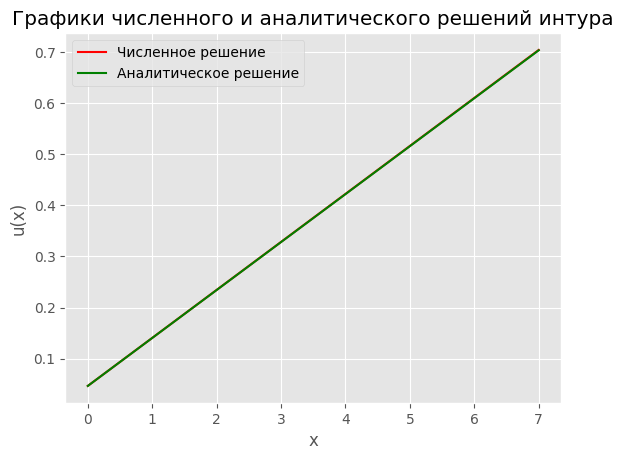

In [ ]:
plt.plot(u_BGSM, c='red', label='Численное решение')
plt.plot(u_ana_values, c='green', label='Аналитическое решение')
plt.title('Графики численного и аналитического решений интура')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

# **Задание 3**

При одинаковых значениях $\varepsilon$ сравнить эффективность и качество сходимости итерационных методов: метода простой итерации, градиентного спуска, двухшагового метода градиентного спуска и стабилизированного метода бисопряжённых градиентов.

### Метод простой итерации:

In [ ]:
def simple_iteration(u_old, B, f, eps):
    steps = 1

    u_new = B @ u_old + f

    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new

            u_new = B @ u_old + f

            norm_diff_u = np.linalg.norm(u_new - u_old)
    else:
        pass

    return u_new, steps

# Для МПИ
E = np.eye(N)
B = E - A

u_MSI, count_steps_MSI = simple_iteration(u_old, B, f, eps)

In [ ]:
print(f"delta_MSI = {error(u_MSI, u_ana_values)}")
print(f"Число шагов: {count_steps_MSI}")

delta_MSI = 0.0009775170772835684
Число шагов: 22


### Градиентный спуск:

In [ ]:
def gradient_descent(u_old, A, f, r, eps):
    steps = 1

    AT = np.matrix.transpose(A) # не обязательно
    AT_r = AT @ r
    up = np.linalg.norm(AT_r) ** 2
    down = np.linalg.norm(A @ AT_r) ** 2

    u_new = u_old - (up / down) * (AT @ r)

    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new
            r = A @ u_old - f
            AT_r = AT @ r
            up = round(np.linalg.norm(AT_r) ** 2, 30)
            down = round(np.linalg.norm(A @ AT_r) ** 2, 30)

            if down != 0:
                u_new = u_old - (up / down) * (AT @ r)

                norm_diff_u = np.linalg.norm(u_new - u_old)
            else:
                break
    else:
        pass

    return u_new, steps

# Для градиентного спуска
r = A @ u_old - f

u_GD, count_steps_GD = gradient_descent(u_old, A, f, r, eps)

In [ ]:
print(f"delta_GD = {error(u_GD, u_ana_values)}")
print(f"Число шагов: {count_steps_GD}")

delta_GD = 0.000977517106549557
Число шагов: 2


### Двухшаговый градиентный спуск:

In [ ]:
def double_step_gradient_descent(u_old, A, f, r, eps):
    steps = 1

    # Cтартовые значения u и r
    u_0 = u_old
    r_0 = r

    # Подготовка к первому шагу
    AT = np.matrix.transpose(A) # не обязательно
    AT_r = AT @ r_0
    up = np.linalg.norm(AT_r) ** 2
    down = np.linalg.norm(A @ AT_r) ** 2

    u_1 = u_0 - (up / down) * (AT @ r_0) # делаем шаг для определения u_1

    # После определения u_1 переходим к основному шагу алгоритма
    r_1 = A @ u_1 - f
    AT_r = AT @ r_1

    Mat = np.array([[np.linalg.norm(r_1 - r_0) ** 2, np.linalg.norm(AT_r) ** 2],
                    [np.linalg.norm(AT_r) ** 2, np.linalg.norm(A @ AT_r) ** 2]])
    Vec = np.array([0.,
                    np.linalg.norm(AT_r) ** 2])
    Ans = np.linalg.pinv(Mat) @ Vec
    alpha = Ans[0]
    gamma = Ans[1]

    u_2 = u_1 - alpha * (u_1 - u_0) - gamma * AT_r # второй шаг (основной)

    norm_diff_u = np.linalg.norm(u_2 - u_1)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_0 = u_1
            u_1 = u_2

            r_0 = r_1
            r_1 = A @ u_1 - f
            AT_r = AT @ r_1

            Mat = np.array([[np.linalg.norm(r_1 - r_0) ** 2, np.linalg.norm(AT_r) ** 2],
                            [np.linalg.norm(AT_r) ** 2, np.linalg.norm(A @ AT_r) ** 2]])
            Vec = np.array([0.,
                            np.linalg.norm(AT_r) ** 2])
            Ans = np.linalg.pinv(Mat) @ Vec
            alpha = Ans[0]
            gamma = Ans[1]

            u_2 = u_1 - alpha * (u_1 - u_0) - gamma * AT_r

            norm_diff_u = np.linalg.norm(u_2 - u_1)
    else:
        pass

    return u_2, steps

# Для двухшагового градиентного спуска
r = A @ u_old - f

u_DSGD, count_steps_DSGD = double_step_gradient_descent(u_old, A, f, r, eps)

In [ ]:
print(f"delta_DSGD = {error(u_DSGD, u_ana_values)}")
print(f"Число шагов: {count_steps_DSGD}")

delta_DSGD = 0.000977517106549557
Число шагов: 1


In [ ]:
Methods_table = {'BGSM': (error(u_BGSM, u_ana_values), count_steps_BGSM),
                 'DSGD': (error(u_DSGD, u_ana_values), count_steps_DSGD),
                 'GD': (error(u_GD, u_ana_values), count_steps_GD),
                 'MSI': (error(u_MSI, u_ana_values), count_steps_MSI)}

print(Methods_table)

Methods_df = pd.DataFrame.from_dict(Methods_table)
print(Methods_df)

{'BGSM': (0.0010086934697387361, 3), 'DSGD': (0.000977517106549557, 1), 'GD': (0.000977517106549557, 2), 'MSI': (0.0009775170772835684, 22)}
       BGSM      DSGD        GD        MSI
0  0.001009  0.000978  0.000978   0.000978
1  3.000000  1.000000  2.000000  22.000000


Интересное замечание между делом. На размерности N=8 BGSM отрабатывает заметно хуже остальных в плане ошибки. А вот на отличных от 8 он работает не хуже остальных. Интересно...

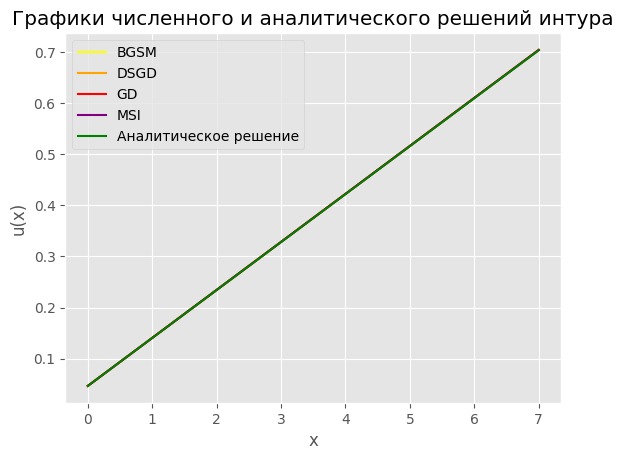

In [ ]:
plt.plot(u_BGSM, c='yellow', label='BGSM')
plt.plot(u_DSGD, c='orange', label='DSGD')
plt.plot(u_GD, c='red', label='GD')
plt.plot(u_MSI, c='purple', label='MSI')
plt.plot(u_ana_values, c='green', label='Аналитическое решение')
plt.title('Графики численного и аналитического решений интура')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()